# **Question 1:What is Boosting in Machine Learning? Explain how it improves weak learners.**

Ans: Boosting is an ensemble learning technique that combines multiple weak learners (simple models with slightly better accuracy than random guessing) into a strong learner to improve predictive performance. Unlike bagging (e.g., Random Forest), which trains models in parallel, boosting trains models sequentially, with each new model focusing on correcting the errors of the previous ones.

Popular boosting algorithms include:

AdaBoost (Adaptive Boosting)

Gradient Boosting Machines (GBM)

XGBoost (Extreme Gradient Boosting)

LightGBM (Light Gradient Boosting)

CatBoost

How Boosting Improves Weak Learners
Boosting enhances weak learners (e.g., shallow decision trees) through an iterative, error-correcting approach:

1. Sequential Training with Weighted Errors
Each new model is trained on a modified version of the data, where misclassified samples from the previous model are given higher weights.

 Example: In AdaBoost, misclassified points are weighted more heavily in the next iteration, forcing the new model to focus on them.

2. Gradient Descent Optimization (Gradient Boosting)
Instead of adjusting weights, Gradient Boosting fits each new model to the residual errors (difference between current predictions and true values) of the previous model.

  This minimizes the loss function (e.g., MSE for regression, log loss for classification) step-by-step.

3. Combining Predictions
The final prediction is a weighted sum of all weak learners’ predictions.

# **Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

Ans:-  AdaBoost (Adaptive Boosting) and Gradient Boosting are both ensemble methods that combine weak learners (typically decision trees) into a strong learner, but they differ significantly in how they train the models. Here is a breakdown of their key differences:

### 1. **Error Handling and Weight Updates**
   - **AdaBoost**:
     - Focuses on misclassified samples by increasing their weights in subsequent iterations.
     - Each new weak learner is trained on a re-weighted version of the data, where misclassified samples from the previous model are given higher importance.
     - The final model is a weighted sum of all weak learners, where weights depend on each learner's accuracy.
   - **Gradient Boosting**:
     - Fits new models to the residual errors (gradients of the loss function) of the previous models.
     - Instead of re-weighting data points, it directly optimizes the loss function (e.g., squared error for regression, log loss for classification) using gradient descent.
     - Each new weak learner corrects the errors made by the ensemble so far.

## 2. **Loss Function Optimization**
   - **AdaBoost**:
     - Uses an exponential loss function implicitly but doesn’t explicitly perform gradient-based optimization.
     - Adjusts sample weights to emphasize "hard" examples.
   - **Gradient Boosting**:
     - Explicitly minimizes a differentiable loss function (e.g., MSE, cross-entropy) by fitting new models to the negative gradient (pseudo-residuals).
     - More flexible since it can handle various loss functions.

### 3. **Model Additivity**
   - **AdaBoost**:
     - Adds weak learners sequentially, with each one focusing on correcting the mistakes of the previous ensemble.
     - Weights weak learners based on their individual accuracy.
   - **Gradient Boosting**:
     - Also adds weak learners sequentially, but each new model fits the residuals (gradients) of the cumulative loss.
     - Typically uses a fixed learning rate (shrinkage) to scale the contribution of each weak learner, preventing overfitting.

### 4. **Handling of Weak Learners**
   - **AdaBoost**:
     - Usually uses stumps (very shallow trees, often depth = 1) as weak learners.
     - Sensitive to noisy data and outliers due to aggressive re-weighting of misclassified samples.
   - **Gradient Boosting**:
     - Can use larger trees (e.g., depth = 3–6), though still constrained to be weak learners.
     - More robust to outliers since it minimizes a continuous loss function.

### 5. **Algorithmic Approach**
   - **AdaBoost**:
     - A special case of forward stagewise additive modeling with exponential loss.
     - Adaptively changes sample distribution but doesn’t use gradients.
   - **Gradient Boosting**:
     - A generalization of boosting to arbitrary differentiable loss functions using gradient descent.
     - More modular and extensible (e.g., XGBoost, LightGBM, and CatBoost are advanced variants).

### **Summary of Key Differences**
| Feature                | AdaBoost                          | Gradient Boosting                     |
|------------------------|-----------------------------------|---------------------------------------|
| **Focus**              | Reweights misclassified samples  | Fits residuals (gradients of loss)    |
| **Loss Function**      | Exponential loss (implicitly)     | Any differentiable loss (explicit)    |
| **Weight Adjustment**  | Sample weights updated            | No sample weights; fits residuals    |
| **Weak Learners**      | Typically shallow (stumps)        | Slightly deeper trees (e.g., depth 3) |
| **Robustness**         | Sensitive to outliers/noise       | More robust (depends on loss function)|



# **Question 3: How does regularization help in XGBoost?**

Ans:- Regularization in XGBoost (Extreme Gradient Boosting) is a key feature that sets it apart from traditional Gradient Boosting Machines (GBMs) and helps prevent overfitting while improving generalization. XGBoost incorporates multiple types of regularization directly into the model's objective function, making it highly robust.
Here’s how regularization works in XGBoost:

---

### **1. Regularization in the Objective Function**
XGBoost’s training process minimizes the following regularized objective function:
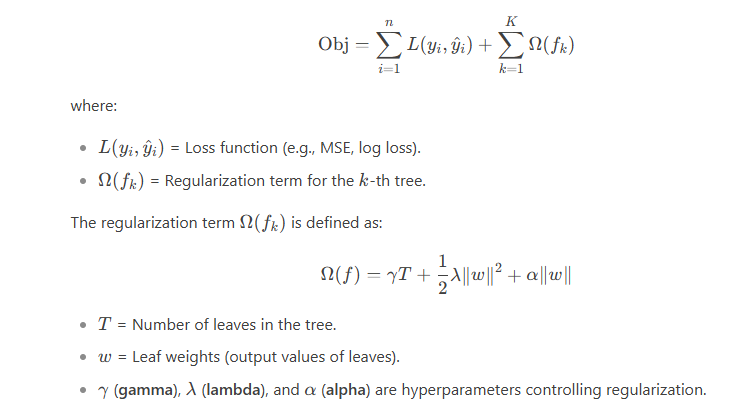

### **2. Types of Regularization in XGBoost**
#### **(a) L1 (Lasso) and L2 (Ridge) Regularization on Leaf Weights**
- **L2 Regularization (\( \lambda \))**:
  - Penalizes large leaf weights by adding \( \frac{1}{2} \lambda \sum w_j^2 \) to the loss.
  - Smooths predictions by discouraging extreme values in leaves.
- **L1 Regularization
  - Adds \( \alpha \sum |w_j| \) to the loss, encouraging sparsity (some leaf weights may shrink to zero).
  - Useful for feature selection.

#### **(b) Tree Complexity Control (Gamma)**
- **Gamma (\( \gamma \))** is the minimum loss reduction required to split a node further.
  - A higher \( \gamma \) makes the algorithm more conservative, pruning splits that don’t improve the loss significantly.
  - Prevents overly complex trees.

#### **(c) Maximum Tree Depth (`max_depth`)**
- Limits how deep a tree can grow, reducing model complexity.
- Smaller `max_depth` = simpler trees, less overfitting.

#### **(d) Minimum Child Weight (`min_child_weight`)**
- Controls the minimum sum of instance weights (Hessian) needed in a child node.
  - For regression, it’s roughly the minimum number of samples in a leaf.
  - Prevents small, unreliable leaves.

#### **(e) Column and Row Subsampling**
- **`colsample_bytree`, `colsample_bylevel`, `colsample_bynode`**:
  - Randomly select a fraction of features for each tree/level/node (like Random Forest).
  - Reduces overfitting by decorrelating trees.
- **`subsample`**:
  - Randomly samples a fraction of training data for each tree (stochastic gradient boosting).
  - Improves generalization and speeds up training.

#### **(f) Learning Rate (`eta` or `learning_rate`)**
- Shrinks the contribution of each tree by a factor `eta` (e.g., 0.1).
  - Slower learning reduces overfitting by making the boosting process more conservative.
  - Requires more trees (`n_estimators`) but often leads to better generalization.

---

### **3. How Regularization Helps in Practice**
1. **Prevents Overfitting**:
   - By penalizing large leaf weights (\( \lambda, \alpha \)) and limiting tree depth (`max_depth`), XGBoost avoids fitting noise in the data.
2. **Improves Generalization**:
   - Subsampling (`subsample`, `colsample_*`) introduces randomness, making the model more robust.
3. **Encourages Simpler Trees**:
   - High `gamma` and `min_child_weight` prune unnecessary splits, leading to interpretable models.
4. **Handles Multicollinearity & Irrelevant Features**:
   - L1/L2 regularization and column subsampling reduce reliance on any single feature.

# **Question 4: Why is CatBoost considered efficient for handling categorical data?**

Ans:-
**CatBoost** (Categorical Boosting) is specifically designed to handle categorical data efficiently, outperforming other gradient boosting frameworks (like XGBoost or LightGBM) in scenarios with high-cardinality categorical features. Here’s why it excels:

---

### **1. Native Handling of Categorical Features**
Unlike XGBoost or LightGBM (which require manual preprocessing like one-hot encoding or label encoding), CatBoost **automatically processes categorical variables** without explicit conversion. This avoids:
- **Dimensionality explosion** (from one-hot encoding high-cardinality features).
- **Information loss** (from arbitrary label encoding).

---

### **2. Ordered Target Encoding (Ordered TS)**
CatBoost uses a **novel encoding scheme** to convert categorical values into numerical representations, minimizing **target leakage** (a common issue in traditional mean/target encoding). Key features:
- **Ordered Target Statistics (TS)**:
  - For each categorical feature, it calculates the target mean (for regression) or class probability (for classification) **using only the preceding rows** (like time-series cross-validation).
  - Prevents data leakage by ensuring the current row’s target isn’t used for its own encoding.
- **Random Permutation**:
  - Rows are shuffled to compute encodings, adding robustness.
---

### **3. Combination of Categorical Features**
CatBoost **automatically generates interactions** between categorical features (e.g., combining `Gender` and `City` into `Gender_City`). This captures complex relationships without manual feature engineering.

---

### **4. Symmetric Decision Trees**
- CatBoost builds **balanced (symmetric) trees**, where the same categorical feature is used across all splits at a given level.
- This reduces overfitting and speeds up prediction time (compared to XGBoost/LightGBM’s asymmetric trees).

---

### **5. Robustness to Overfitting**
- **Ordered Boosting**: Similar to its encoding, CatBoost uses a permutation-based approach during training to avoid leakage in gradient estimation.
- **Regularization**: Includes L2 regularization on leaf values and penalties for feature combinations.

---

### **6. GPU Acceleration**
CatBoost is optimized for **GPU training**, especially for categorical data. Preprocessing (encoding) and tree construction are significantly faster than CPU-based methods.

---

### **7. Handling Missing Values**
CatBoost natively handles missing values in categorical features without imputation, treating them as a separate category.

---

### **Comparison with Other Boosters**
| Feature               | CatBoost                          | XGBoost/LightGBM               |
|-----------------------|-----------------------------------|--------------------------------|
| **Categorical Support** | Native (no preprocessing)        | Requires encoding (OHE, label) |
| **Target Leakage**    | Prevented via Ordered TS          | Risk with mean/target encoding |
| **Feature Combos**    | Automatic                         | Manual or ignored              |
| **Training Speed**    | Fast (GPU-optimized)              | Slower with categorical data   |

---

# **Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?**

Ans:- Boosting techniques (like AdaBoost, Gradient Boosting, XGBoost, LightGBM, and CatBoost) are often preferred over bagging methods (e.g., Random Forest) in scenarios where:  
1. **High predictive accuracy** is critical,  
2. The data has **complex patterns or imbalanced classes**,  
3. **Categorical features** or **heterogeneous data** are present, or  
4. **Overfitting** must be minimized with careful regularization.  

Here are some real-world applications where boosting shines:

---

### **1. Fraud Detection (Finance)**
- **Why Boosting?**  
  - Fraud datasets are highly imbalanced (<1% fraud cases).  
  - Boosting (e.g., XGBoost, LightGBM) focuses on misclassified minority-class samples by iteratively reweighting them.  
  - Handles non-linear relationships (e.g., transaction patterns) better than bagging.  
- **Example**: PayPal uses boosting models to flag suspicious transactions.

---

### **2. Click-Through Rate (CTR) Prediction (Advertising)**
- **Why Boosting?**  
  - Requires fine-grained probability estimates (e.g., likelihood of ad clicks).  
  - Gradient boosting (LightGBM, CatBoost) handles sparse, high-cardinality categorical features (e.g., user IDs, ad IDs) natively.  
  - Outperforms Random Forest in capturing feature interactions.  
- **Example**: Facebook and Google use boosting for ad targeting.

---

### **3. Medical Diagnosis (Healthcare)**
- **Why Boosting?**  
  - Small datasets with noisy/missing features (e.g., patient records).  
  - Boosting’s sequential error correction improves sensitivity to rare diseases.  
  - CatBoost handles categorical lab results (e.g., blood type) without manual encoding.  
- **Example**: Predicting diabetic retinopathy from retinal images.

---

### **4. Credit Scoring (Banking)**
- **Why Boosting?**  
  - Combines numerical (income) and categorical (employment type) features effectively.  
  - XGBoost’s regularization prevents overfitting on limited historical data.  
  - Provides interpretable feature importance for regulatory compliance.  
- **Example**: FICO scores and loan approval systems.

---

### **5. Recommendation Systems (E-commerce)**
- **Why Boosting?**  
  - Handles user-item interaction features (e.g., purchase history, demographics).  
  - LightGBM’s GPU support speeds up training on large, sparse datasets.  
  - Better at capturing long-tail patterns (niche preferences) than bagging.  
- **Example**: Amazon’s "Customers who bought this also bought" feature.

---

### **6. Anomaly Detection (Cybersecurity)**
- **Why Boosting?**  
  - Rare anomalies (e.g., network intrusions) require iterative reweighting.  
  - AdaBoost excels at emphasizing hard-to-classify outliers.  
  - Gradient boosting models (XGBoost) optimize custom loss functions for anomalies.  
- **Example**: Detecting DDoS attacks in real-time logs.

---

### **7. Natural Language Processing (NLP)**
- **Why Boosting?**  
  - Text data has high-dimensional, sparse features (e.g., TF-IDF, word embeddings).  
  - Boosting (e.g., CatBoost) works well with shallow decision trees on text vectors.  
  - Outperforms Random Forest in sentiment analysis or spam detection.  
- **Example**: Gmail’s spam filter.

---

### **Key Advantages of Boosting Over Bagging**  
| **Scenario**               | **Boosting**                                      | **Bagging (e.g., Random Forest)**               |  
|----------------------------|---------------------------------------------------|------------------------------------------------|  
| **Imbalanced Data**        | Reweights minority classes (AdaBoost, XGBoost)    | Balanced bootstrapping may ignore rare cases   |  
| **Categorical Features**   | Native handling (CatBoost)                        | Requires encoding (one-hot, label)             |  
| **Small-to-Medium Data**   | Less prone to overfitting (regularization)        | May overfit with limited data                  |  
| **Complex Interactions**   | Iteratively captures non-linear patterns          | Random splits may miss subtle relationships    |  
| **Prediction Speed**       | Faster inference (shallower trees in boosting)    | Slower due to larger ensemble of deep trees    |  


**Question 6: Write a Python program to:
● Load the Breast Cancer dataset using
sklearn.datasets.load_breast_cancer()
● Train a Random Forest Classifier
● Print the top 5 most important features based on feature importance scores.**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importance scores
importance_scores = clf.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': importance_scores
})

# Sort the DataFrame by importance scores in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print the top 5 most important features
print("Top 5 most important features:")
print(feature_importance.head(5))

Top 5 most important features:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


**Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print(f"R-squared score: {r2:.4f}")



R-squared score: 0.7756


**Question 8: Write a Python program to:
● Train a Random Forest Classifier
● Tune hyperparameters max_depth and n_estimators using GridSearchCV
● Print the best parameters and final accuracy**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the Iris dataset (you can replace this with any other dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Make predictions with the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and final accuracy
print(f"Best parameters: {best_params}")
print(f"Final accuracy: {accuracy:.4f}")


Best parameters: {'max_depth': None, 'n_estimators': 200}
Final accuracy: 1.0000


**Question 9: Write a Python program to:
● Train a Bagging Regressor and a Random Forest Regressor on the California
Housing dataset
● Compare their Mean Squared Errors (MSE)**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Regressor
bagging_regressor = BaggingRegressor(random_state=42)
bagging_regressor.fit(X_train, y_train)

# Make predictions with the Bagging Regressor
y_pred_bagging = bagging_regressor.predict(X_test)

# Calculate Mean Squared Error for Bagging Regressor
mse_bagging = mean_squared_error(y_test, y_pred_bagging)

# Train a Random Forest Regressor
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, y_train)

# Make predictions with the Random Forest Regressor
y_pred_rf = random_forest_regressor.predict(X_test)

# Calculate Mean Squared Error for Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print the Mean Squared Errors
print(f"Mean Squared Error (Bagging Regressor): {mse_bagging:.4f}")
print(f"Mean Squared Error (Random Forest Regressor): {mse_rf:.4f}")


Mean Squared Error (Bagging Regressor): 0.2824
Mean Squared Error (Random Forest Regressor): 0.2554


**Question 10: You are working as a data scientist at a financial institution to predict loan
default. You have access to customer demographic and transaction history data.
You decide to use ensemble techniques to increase model performance.
Explain your step-by-step approach to:
● Choose between Bagging or Boosting
● Handle overfitting
● Select base models
● Evaluate performance using cross-validation
● Justify how ensemble learning improves decision-making in this real-world**

### **1. Choose Between Bagging or Boosting**
**Decision Criteria:**  
- **Bagging** is preferred if:  
  - The dataset has high variance (overfitting risk) or noisy data.  
  - You need parallel training (faster computation).  
  - Interpretability of feature importance is required (e.g., for regulatory compliance).  
- **Boosting** is better if:  
  - The dataset is large and complex, with imbalanced classes (common in defaults).  
  - Sequential improvement of errors (boosting focuses on misclassified samples).  
  - Predictive performance is the top priority (boosting often outperforms bagging).  

**Justification for Loan Default Prediction:**  
- Default datasets are typically imbalanced (few defaults). Boosting (e.g., XGBoost with `scale_pos_weight`) handles this well.  
- If transparency is critical (e.g., explaining denials to regulators), bagging (Random Forest) provides clearer feature importance.  

---

### **2. Handle Overfitting**
**Strategies:**  
- **For Bagging:**  
  - Limit tree depth (`max_depth`), increase `min_samples_leaf`, or reduce the number of features per split (`max_features`).  
- **For Boosting:**  
  - Use regularization (XGBoost’s `gamma`, `lambda`, `alpha`), early stopping (`early_stopping_rounds`), and shrinkage (`learning_rate`).  
- **General:**  
  - Use class weighting (e.g., `class_weight='balanced'`) or SMOTE for imbalance.  
  - Feature selection to remove irrelevant variables (e.g., low-correlation demographics).  

---

### **3. Select Base Models**
**Guidelines:**  
- **Diversity Matters:** Combine models that make errors differently (e.g., tree-based + linear models like logistic regression).  
- **Practical Choices:**  
  - **Primary Base Model:** Gradient Boosted Trees (XGBoost/LightGBM) for handling non-linear relationships.  
  - **Secondary Models:** Random Forest (for robustness) and Logistic Regression (for simple patterns).  
- **Stacking:** Use a meta-model (e.g., logistic regression) to combine predictions from diverse base models.  

---

### **4. Evaluate Performance Using Cross-Validation**
**Approach:**  
- **Stratified K-Fold CV** (e.g., 5 folds) to preserve class distribution in splits.  
- **Metrics:**  
  - **Primary:** AUC-ROC (handles imbalance well).  
  - **Secondary:** Precision-Recall curve (focus on capturing defaults without excessive false positives).  
  - **Business Metrics:** Expected loss (combining default probability and loan amount).  
- **Validation:** Hold-out test set for final evaluation (simulates real-world deployment).  

---

### **5. Justify Ensemble Learning for Loan Decisions**
**Why Ensembles?**  
- **Improved Accuracy:** Combines multiple weak learners to reduce bias (boosting) or variance (bagging).  
- **Risk Mitigation:** More stable predictions than single models (critical for financial decisions).  
- **Regulatory Compliance:**  
  - Feature importance (from Random Forest) can justify denials under fair lending laws.  
  - Calibrated probability outputs (via ensemble averaging) ensure realistic risk pricing.  

**Real-World Impact:**  
- **Reduced Defaults:** Better identification of high-risk borrowers.  
- **Profitability:** Fewer false positives (approving bad loans) and false negatives (rejecting good customers).  

